In [32]:
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pylab as plt
from scipy import stats
import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn import preprocessing 
%matplotlib inline 

In [2]:
# Load the data and show the info and contents:
df = pd.read_csv('energydata_complete.csv') 
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Variable Description
====================

- date time year-month-day hour:minute:second 
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chièvres weather station), in Celsius
- Pressure (from Chièvres weather station), in mm Hg
- RH_out, Humidity outside (from Chièvres weather station), in %
- Windspeed (from Chièvres weather station), in m/s
- Visibility (from Chièvres weather station), in km
- Tdewpoint (from Chièvres weather station), °C
- rv1, Random variable 1, nondimensional
- rv2, Rnadom variable 2, nondimensional

Text(0, 0.5, 'Count')

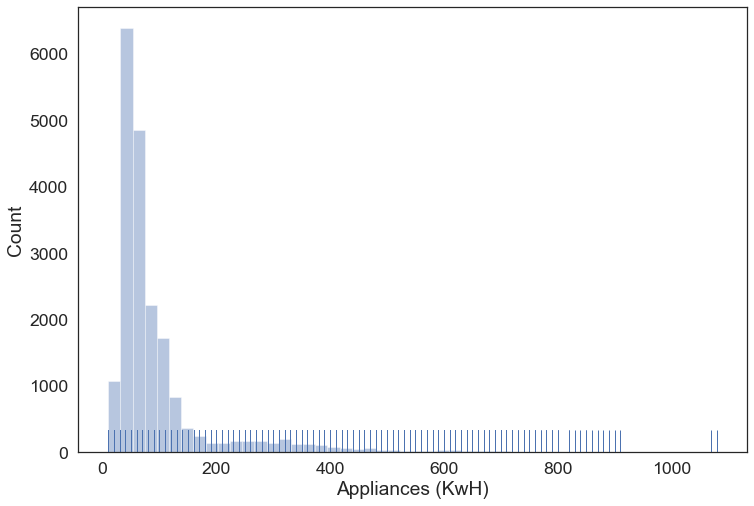

In [24]:
sns.set(rc={'figure.figsize':(12,8.2)},style='white', font_scale=1.6)
sns.distplot(df['Appliances'],kde=False,rug=True)
plt.xlabel('Appliances (KwH)')
plt.ylabel('Count')

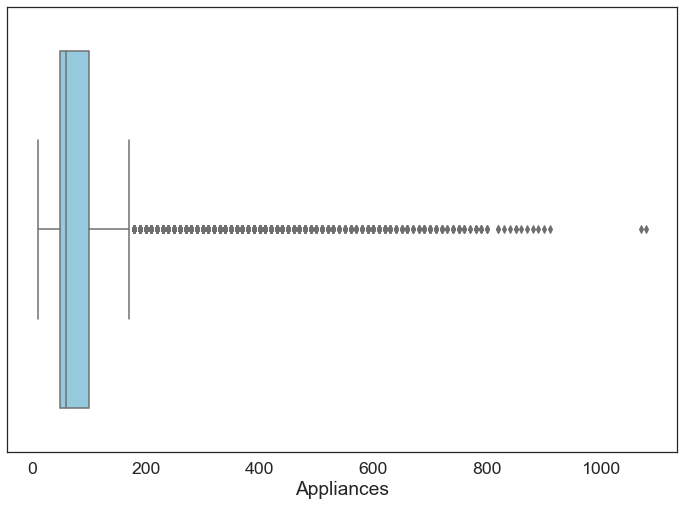

In [25]:
box = sns.boxplot(x=df['Appliances'], color='skyblue')
box

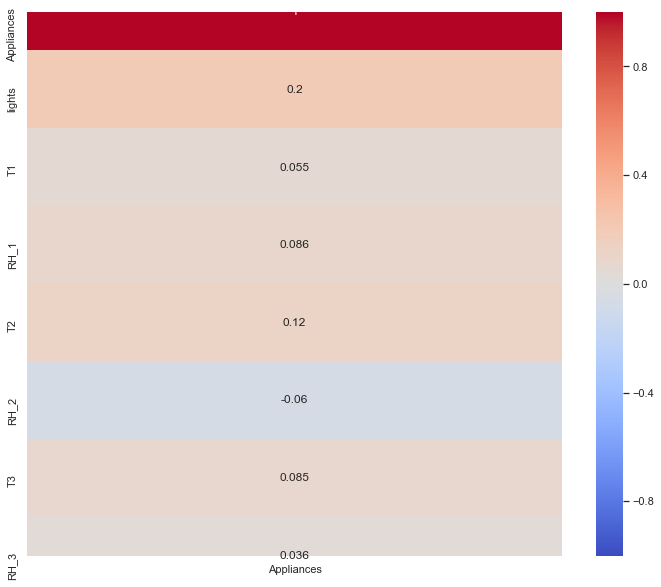

In [42]:
var = df[['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3']]
corr = var.corr()
corr
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr[['Appliances']],
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True)

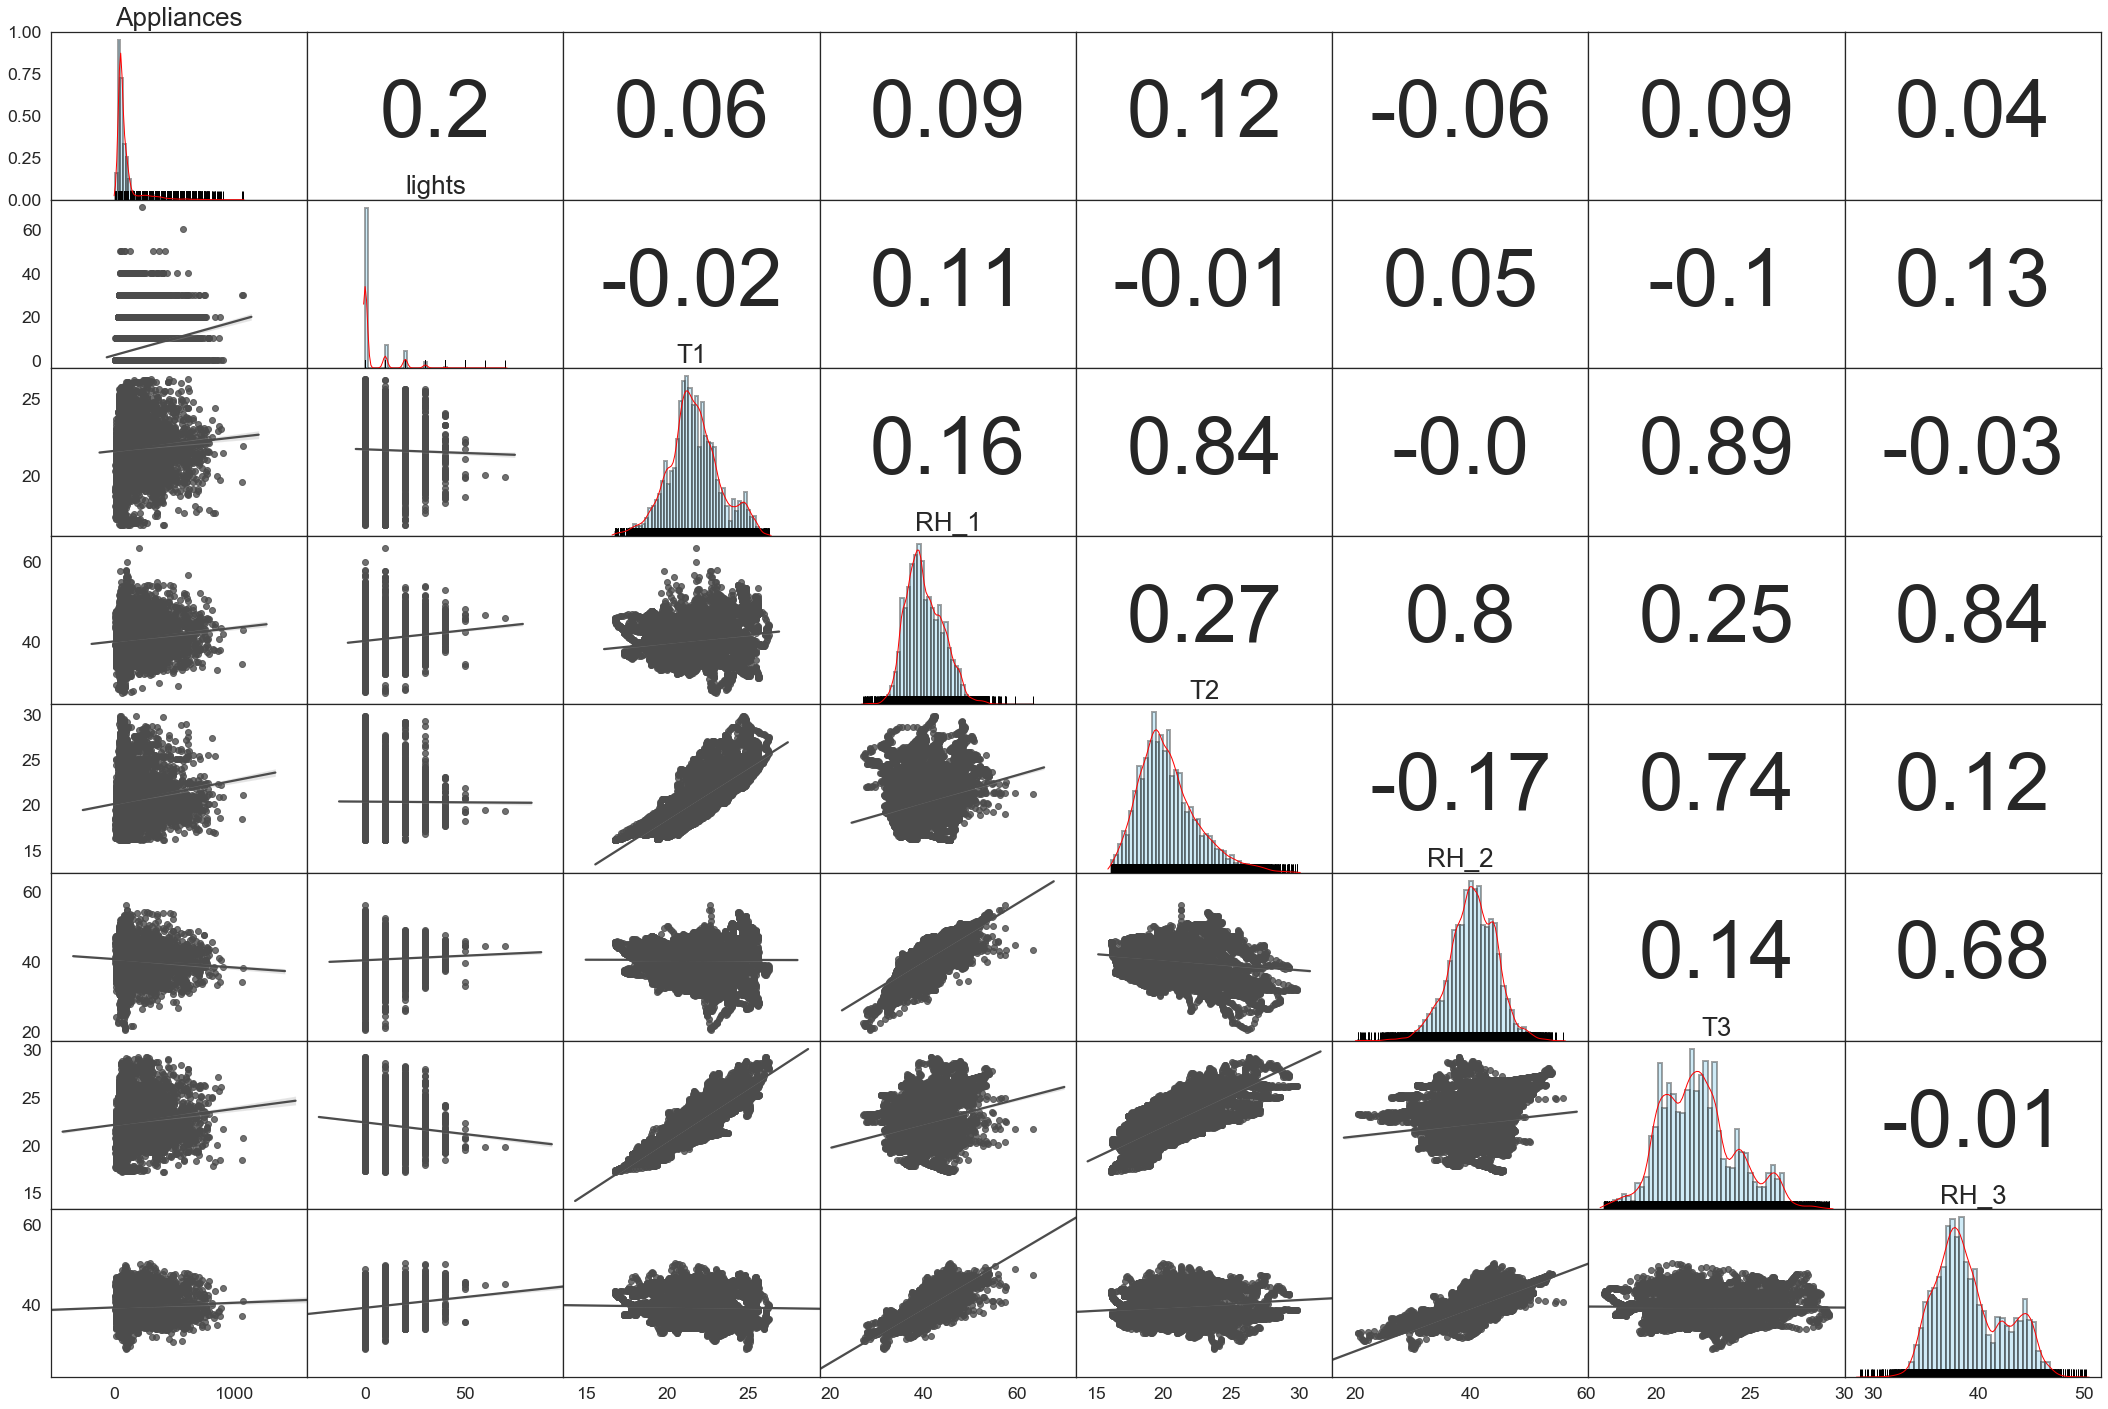

In [5]:
var = df[['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3']]
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=80)
    

g = sns.PairGrid(var, aspect=1.5, diag_sharey=False, despine=False)
g.map_diag(sns.distplot, color='skyblue',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'skyblue'})
g.map_diag(sns.rugplot, color='black')
g.map_lower(sns.regplot, color='.3')
g.map_upper(corrdot)
#g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
#Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), var.columns):
    ax.set_title(col, y=0.82, fontsize=26)
#remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
g

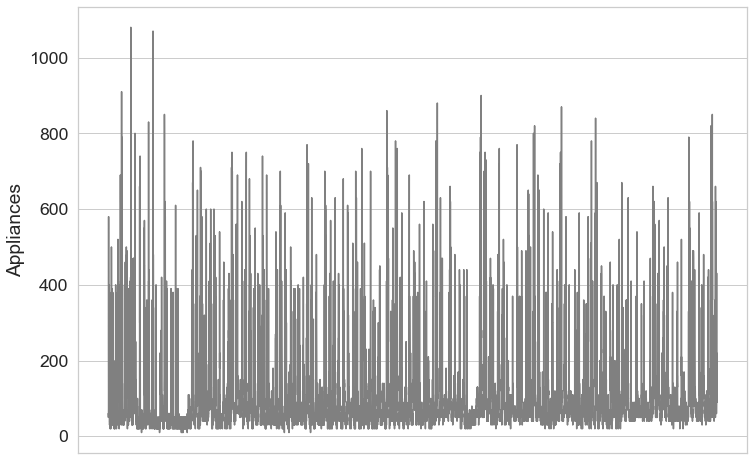

In [6]:
sns.set(rc={'figure.figsize':(12,8.2)},style='whitegrid', font_scale=1.6)
#months = df.index.to_series(keep_tz=True).apply(lambda x:dt.datetime.strftime(x,'%b'))
#df['months'] = months
l = sns.lineplot(x=df.index,y='Appliances',data=df, sort=False, color='grey')
plt.xticks(rotation=45)
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

In [7]:
#months = df.index.to_series(keep_tz=True).apply(lambda x:dt.datetime.strftime(x,'%b %Y'))

In [8]:
estimator = LinearRegression()

feature_cols = np.array(['lights', 'T1', 'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7', \
                         'RH_7','T8','RH_8','T9', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint', \
                        'rv1','rv2'])
X = df[feature_cols]
y = df.Appliances
selector = RFE(estimator)
select = selector.fit(X,y)
supp = selector.get_support()
print('Selected features:', feature_cols[supp])
print('Coeffs:', selector.estimator_.coef_)

Selected features: ['lights' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'T6' 'T8' 'RH_8' 'T9'
 'T_out' 'Windspeed']
Coeffs: [  2.02860389  15.63680395 -18.3372442  -13.87188524  24.54896549
   4.3578738   -3.3000091    6.29273411   9.40404516  -5.60866293
 -16.58068793  -5.53558785   1.8026986 ]


In [9]:
train = pd.read_csv('testing.csv')
reg = linear_model.LinearRegression()
X = train[feature_cols[supp]]
y = train.Appliances
reg.fit(X,y)
print("y = x *", reg.coef_, "+", reg.intercept_)


y = x * [  2.14542985  14.50739199 -14.86700686 -11.56862657  21.58276676
   2.96646255  -4.23519572   6.2670374    8.07375139  -5.59850542
 -15.41900858  -5.5739486    1.84675823] + 113.95444182616586


In [10]:
corr = train[feature_cols[supp]].corr()
corr

,lights,RH_1,T2,RH_2,T3,RH_3,T4,T6,T8,RH_8,T9,T_out,Windspeed
lights,1.000000,0.089982,0.012084,0.025959,-0.092463,0.119153,-0.006392,-0.083838,-0.062862,0.003222,-0.151516,-0.080316,0.051305
RH_1,0.089982,1.000000,0.259709,0.795770,0.241030,0.842924,0.092742,0.309539,-0.037834,0.736154,0.107391,0.335177,0.208672
T2,0.012084,0.259709,1.000000,-0.180430,0.732095,0.115505,0.757176,0.797997,0.578585,0.062137,0.670125,0.788204,0.057187
RH_2,0.025959,0.795770,-0.180430,1.000000,0.123910,0.671003,-0.057805,-0.018386,-0.051538,0.681939,0.048387,0.026270,0.065977
T3,-0.092463,0.241030,0.732095,0.123910,1.000000,-0.021822,0.857370,0.680918,0.799916,0.043340,0.901471,0.694268,-0.098300
RH_3,0.119153,0.842924,0.115505,0.671003,-0.021822,1.000000,-0.154173,0.069102,-0.296182,0.826282,-0.205715,0.111622,0.262425
T4,-0.006392,0.092742,0.757176,-0.057805,0.857370,-0.154173,1.000000,0.642711,0.805875,-0.102171,0.893283,0.653331,-0.191034
T6,-0.083838,0.309539,0.797997,-0.018386,0.680918,0.069102,0.642711,1.000000,0.485462,0.072417,0.662724,0.974610,0.170834
T8,-0.062862,-0.037834,0.578585,-0.051538,0.799916,-0.296182,0.805875,0.485462,1.000000,-0.211796,0.871484,0.503934,-0.212499
RH_8,0.003222,0.736154,0.062137,0.681939,0.043340,0.826282,-0.102171,0.072417,-0.211796,1.000000,-0.109802,0.118036,0.208297


In [11]:
for i, item in enumerate(reg.predict(X[:20])):
    print('Actual usage is:', y.iloc[i], 'predicted usage is:', item)

Actual usage is: 50 predicted usage is: 175.93984503391584
Actual usage is: 60 predicted usage is: 192.82518345313673
Actual usage is: 230 predicted usage is: 236.36385268648922
Actual usage is: 580 predicted usage is: 221.90418275465544
Actual usage is: 100 predicted usage is: 200.28451766050046
Actual usage is: 70 predicted usage is: 231.75441226210677
Actual usage is: 190 predicted usage is: 179.16052148286855
Actual usage is: 110 predicted usage is: 175.78074573632392
Actual usage is: 100 predicted usage is: 117.27440849055559
Actual usage is: 60 predicted usage is: 106.4117200780648
Actual usage is: 380 predicted usage is: 99.19328260364439
Actual usage is: 370 predicted usage is: 94.59151059763873
Actual usage is: 50 predicted usage is: 46.673957553545605
Actual usage is: 50 predicted usage is: 41.28028112590481
Actual usage is: 40 predicted usage is: 46.21789136265937
Actual usage is: 20 predicted usage is: 52.269449099901216
Actual usage is: 50 predicted usage is: 58.5310526469

In [12]:
predicted = reg.predict(X)
r2 = r2_score(y,predicted)
MSE = metrics.mean_squared_error(y, predicted)
print('MSE:', MSE)
print('R Squared:',r2)

MSE: 8747.493944608543
R Squared: 0.15264812978086484


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
Appliances,1.000000,0.205172,0.041204,0.082143,0.105986,-0.058504,0.059631,0.034787,0.019822,0.018967,...,-0.055165,0.082867,-0.043004,-0.144086,0.092821,0.015569,0.002429,-0.006692,-0.006692,0.220071
lights,0.205172,1.000000,-0.009113,0.089982,0.012084,0.025959,-0.092463,0.119153,-0.006392,0.110966,...,-0.016644,-0.080316,-0.022058,0.062926,0.051305,0.032906,-0.048401,0.001511,0.001511,0.269804
T1,0.041204,-0.009113,1.000000,0.155879,0.833521,-0.011779,0.891702,-0.035304,0.879277,0.094876,...,0.069019,0.679726,-0.151833,-0.344089,-0.082235,-0.074176,0.571497,-0.009268,-0.009268,0.175903
RH_1,0.082143,0.089982,0.155879,1.000000,0.259709,0.795770,0.241030,0.842924,0.092742,0.877921,...,0.761088,0.335177,-0.291327,0.272457,0.208672,-0.042115,0.630835,0.002644,0.002644,0.009815
T2,0.105986,0.012084,0.833521,0.259709,1.000000,-0.180430,0.732095,0.115505,0.757176,0.225887,...,0.148405,0.788204,-0.135347,-0.509725,0.057187,-0.068577,0.578374,-0.015942,-0.015942,0.254459
RH_2,-0.058504,0.025959,-0.011779,0.795770,-0.180430,1.000000,0.123910,0.671003,-0.057805,0.717620,...,0.674193,0.026270,-0.247562,0.588054,0.065977,-0.027517,0.489502,0.010677,0.010677,-0.195527
T3,0.059631,-0.092463,0.891702,0.241030,0.732095,0.123910,1.000000,-0.021822,0.857370,0.112928,...,0.123210,0.694268,-0.192856,-0.280468,-0.098300,-0.108254,0.642542,-0.014330,-0.014330,0.031086
RH_3,0.034787,0.119153,-0.035304,0.842924,0.115505,0.671003,-0.021822,1.000000,-0.154173,0.896136,...,0.828915,0.111622,-0.222670,0.353175,0.262425,0.002256,0.402175,0.001062,0.001062,-0.055745
T4,0.019822,-0.006392,0.879277,0.092742,0.757176,-0.057805,0.857370,-0.154173,1.000000,-0.059403,...,-0.035106,0.653331,-0.082900,-0.383155,-0.191034,-0.107399,0.513694,-0.009474,-0.009474,0.082469
RH_4,0.018967,0.110966,0.094876,0.877921,0.225887,0.717620,0.112928,0.896136,-0.059403,1.000000,...,0.854887,0.290969,-0.246811,0.331256,0.306649,-0.017633,0.609182,-0.002368,-0.002368,-0.024025


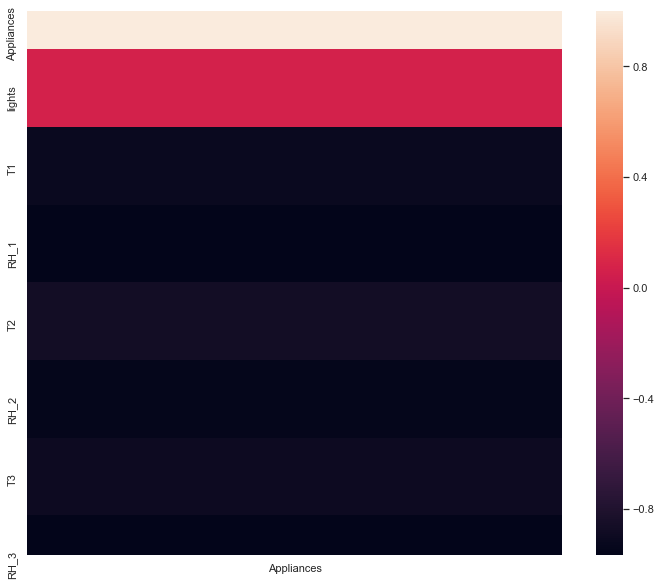

In [51]:
n_var = preprocessing.normalize(var,norm='l1')
n_var
var
n_var = pd.DataFrame(n_var, columns=['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3'])
n_corr = n_var.corr()
sns.heatmap(n_corr[['Appliances']])